In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [3]:
data = pd.read_csv('heart_v2.csv')
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
data.corr()

,age,sex,BP,cholestrol,heart disease
age,1.000000,-0.094401,0.273053,0.220056,0.212322
sex,-0.094401,1.000000,-0.062693,-0.201647,0.297721
BP,0.273053,-0.062693,1.000000,0.173019,0.155383
cholestrol,0.220056,-0.201647,0.173019,1.000000,0.118021
heart disease,0.212322,0.297721,0.155383,0.118021,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [6]:
data.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [7]:
print(len(data[data['heart disease'] == 1]))
print(len(data[data['heart disease'] == 0]))


120
150


In [19]:
X = data.iloc[:, :4]
Y = data.iloc[:, 4:]


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

In [11]:
# from sklearn.preprocessing import StandardScaler
# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [12]:
def impressions(model,accuracy):
    print('Accuracy: {} %'.format(accuracy))
    # print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
    cm=confusion_matrix(Y_test,Y_pred)
    class_label = [0, 1]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

Accuracy: 62.963 %


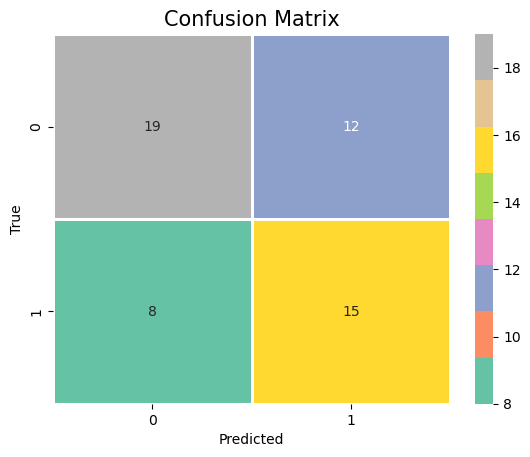

62.963


In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1, max_depth=50)
tree.fit(X_train,Y_train)
Y_pred = tree.predict(X_test)

tree_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(tree,tree_accuracy)

# Y_score = tree.predict_proba(X_test)[:,1]
# print(Y_score)
print(tree_accuracy)

Accuracy: 70.37 %


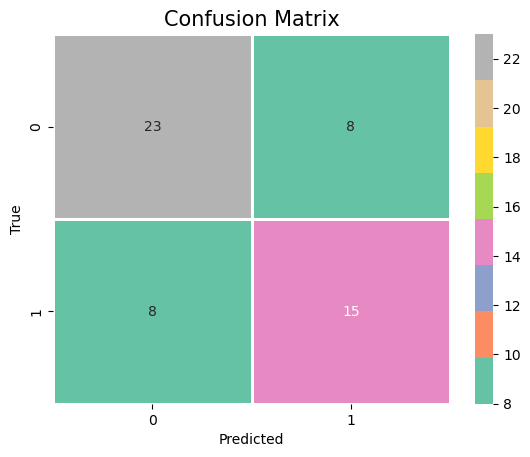

In [26]:
Y_pred= svc.predict(X_test)

svc_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(svc,svc_accuracy)

In [27]:
d = X_test.iloc[1:2]
d

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [21]:
Y_test.iloc[1:2]

,heart disease
221,1


In [22]:
svc.predict(d)[0]


0